<a href="https://colab.research.google.com/github/Jerfersonnas/-Comparative-Sorting-Algorithms/blob/main/Projeto_Final_An%C3%A1lise_de_Algoritmos_de_Ordena%C3%A7%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Algoritmo  Tamanho de Entrada  Tempo (s)
0      Bubble Sort         pequena_100   0.000386
1      Bubble Sort          media_1000   0.049435
2      Bubble Sort        grande_10000   5.874100
3      Bubble Sort  muito_grande_50000   1.425820
4       Merge Sort         pequena_100   0.000252
5       Merge Sort          media_1000   0.001898
6       Merge Sort        grande_10000   0.024556
7       Merge Sort  muito_grande_50000   0.011031
8   Selection Sort         pequena_100   0.000223
9   Selection Sort          media_1000   0.024098
10  Selection Sort        grande_10000   3.782757
11  Selection Sort  muito_grande_50000   0.613973
12  Insertion Sort         pequena_100   0.000208
13  Insertion Sort          media_1000   0.022582
14  Insertion Sort        grande_10000   2.499954
15  Insertion Sort  muito_grande_50000   0.605944


/tmp/ipython-input-2078425954.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_algoritmo["Tamanho de Entrada Numérico"] = dados_algoritmo["Tamanho de Entrada"].map(tamanho_map)
/tmp/ipython-input-2078425954.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_algoritmo["Tamanho de Entrada Numérico"] = dados_algoritmo["Tamanho de Entrada"].map(tamanho_map)
/tmp/ipython-input-2078425954.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

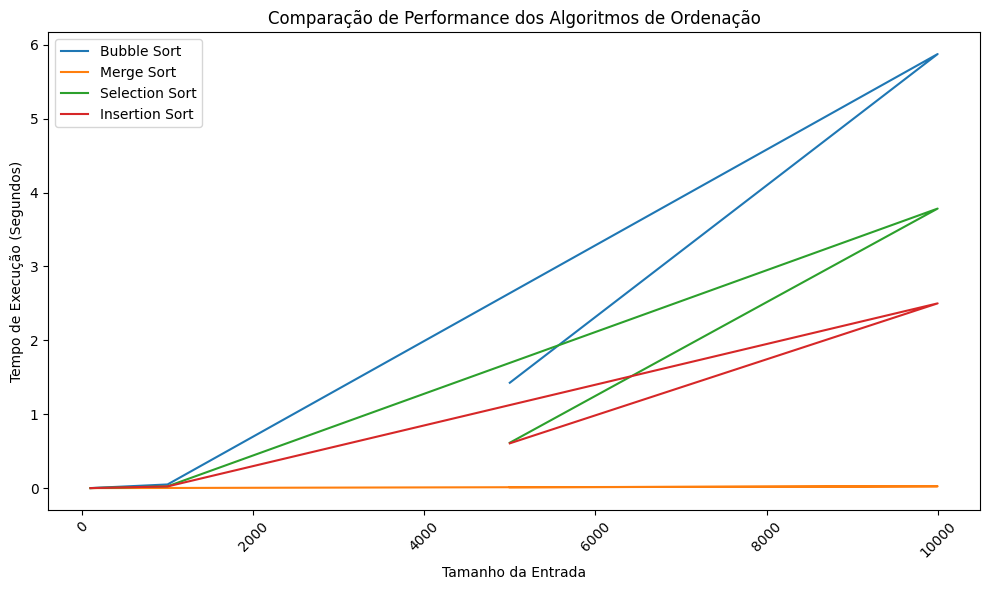

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        trocou = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                trocou = True
        if not trocou:
            break

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def medir_tempo(algoritmo, dados):
    inicio = time.perf_counter()
    algoritmo(dados.copy())
    fim = time.perf_counter()
    return fim - inicio


def gerar_dados():
    dados = {
        "pequena_100": random.sample(range(1000), 100),
        "media_1000": random.sample(range(10000), 1000),
        "grande_10000": random.sample(range(100000), 10000),
        "muito_grande_50000": random.sample(range(100000), 5000)
    }
    return dados


dados_base = gerar_dados()


algoritmos = [
    ("Bubble Sort", bubble_sort),
    ("Merge Sort", merge_sort),
    ("Selection Sort", selection_sort),
    ("Insertion Sort", insertion_sort)
]

resultados = []


for nome, func in algoritmos:
    for tamanho, dados in dados_base.items():
        tempo = medir_tempo(func, dados)
        resultados.append({"Algoritmo": nome, "Tamanho de Entrada": tamanho, "Tempo (s)": tempo})


df_resultados = pd.DataFrame(resultados)


print(df_resultados)


plt.figure(figsize=(10, 6))


tamanho_map = {"pequena_100": 100, "media_1000": 1000, "grande_10000": 10000, "muito_grande_50000": 5000}


for nome in df_resultados["Algoritmo"].unique():
    dados_algoritmo = df_resultados[df_resultados["Algoritmo"] == nome]
    dados_algoritmo["Tamanho de Entrada Numérico"] = dados_algoritmo["Tamanho de Entrada"].map(tamanho_map)
    plt.plot(dados_algoritmo["Tamanho de Entrada Numérico"], dados_algoritmo["Tempo (s)"], label=nome)

plt.title("Comparação de Performance dos Algoritmos de Ordenação")
plt.xlabel("Tamanho da Entrada")
plt.ylabel("Tempo de Execução (Segundos)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')